<a href="https://colab.research.google.com/github/Mrutyunjay01/100daysofML/blob/master/EmployeeAttritionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [4]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [5]:
attrition_data.Attrition.value_counts()
# 856 left, 172 stayed

0    856
1    172
Name: Attrition, dtype: int64

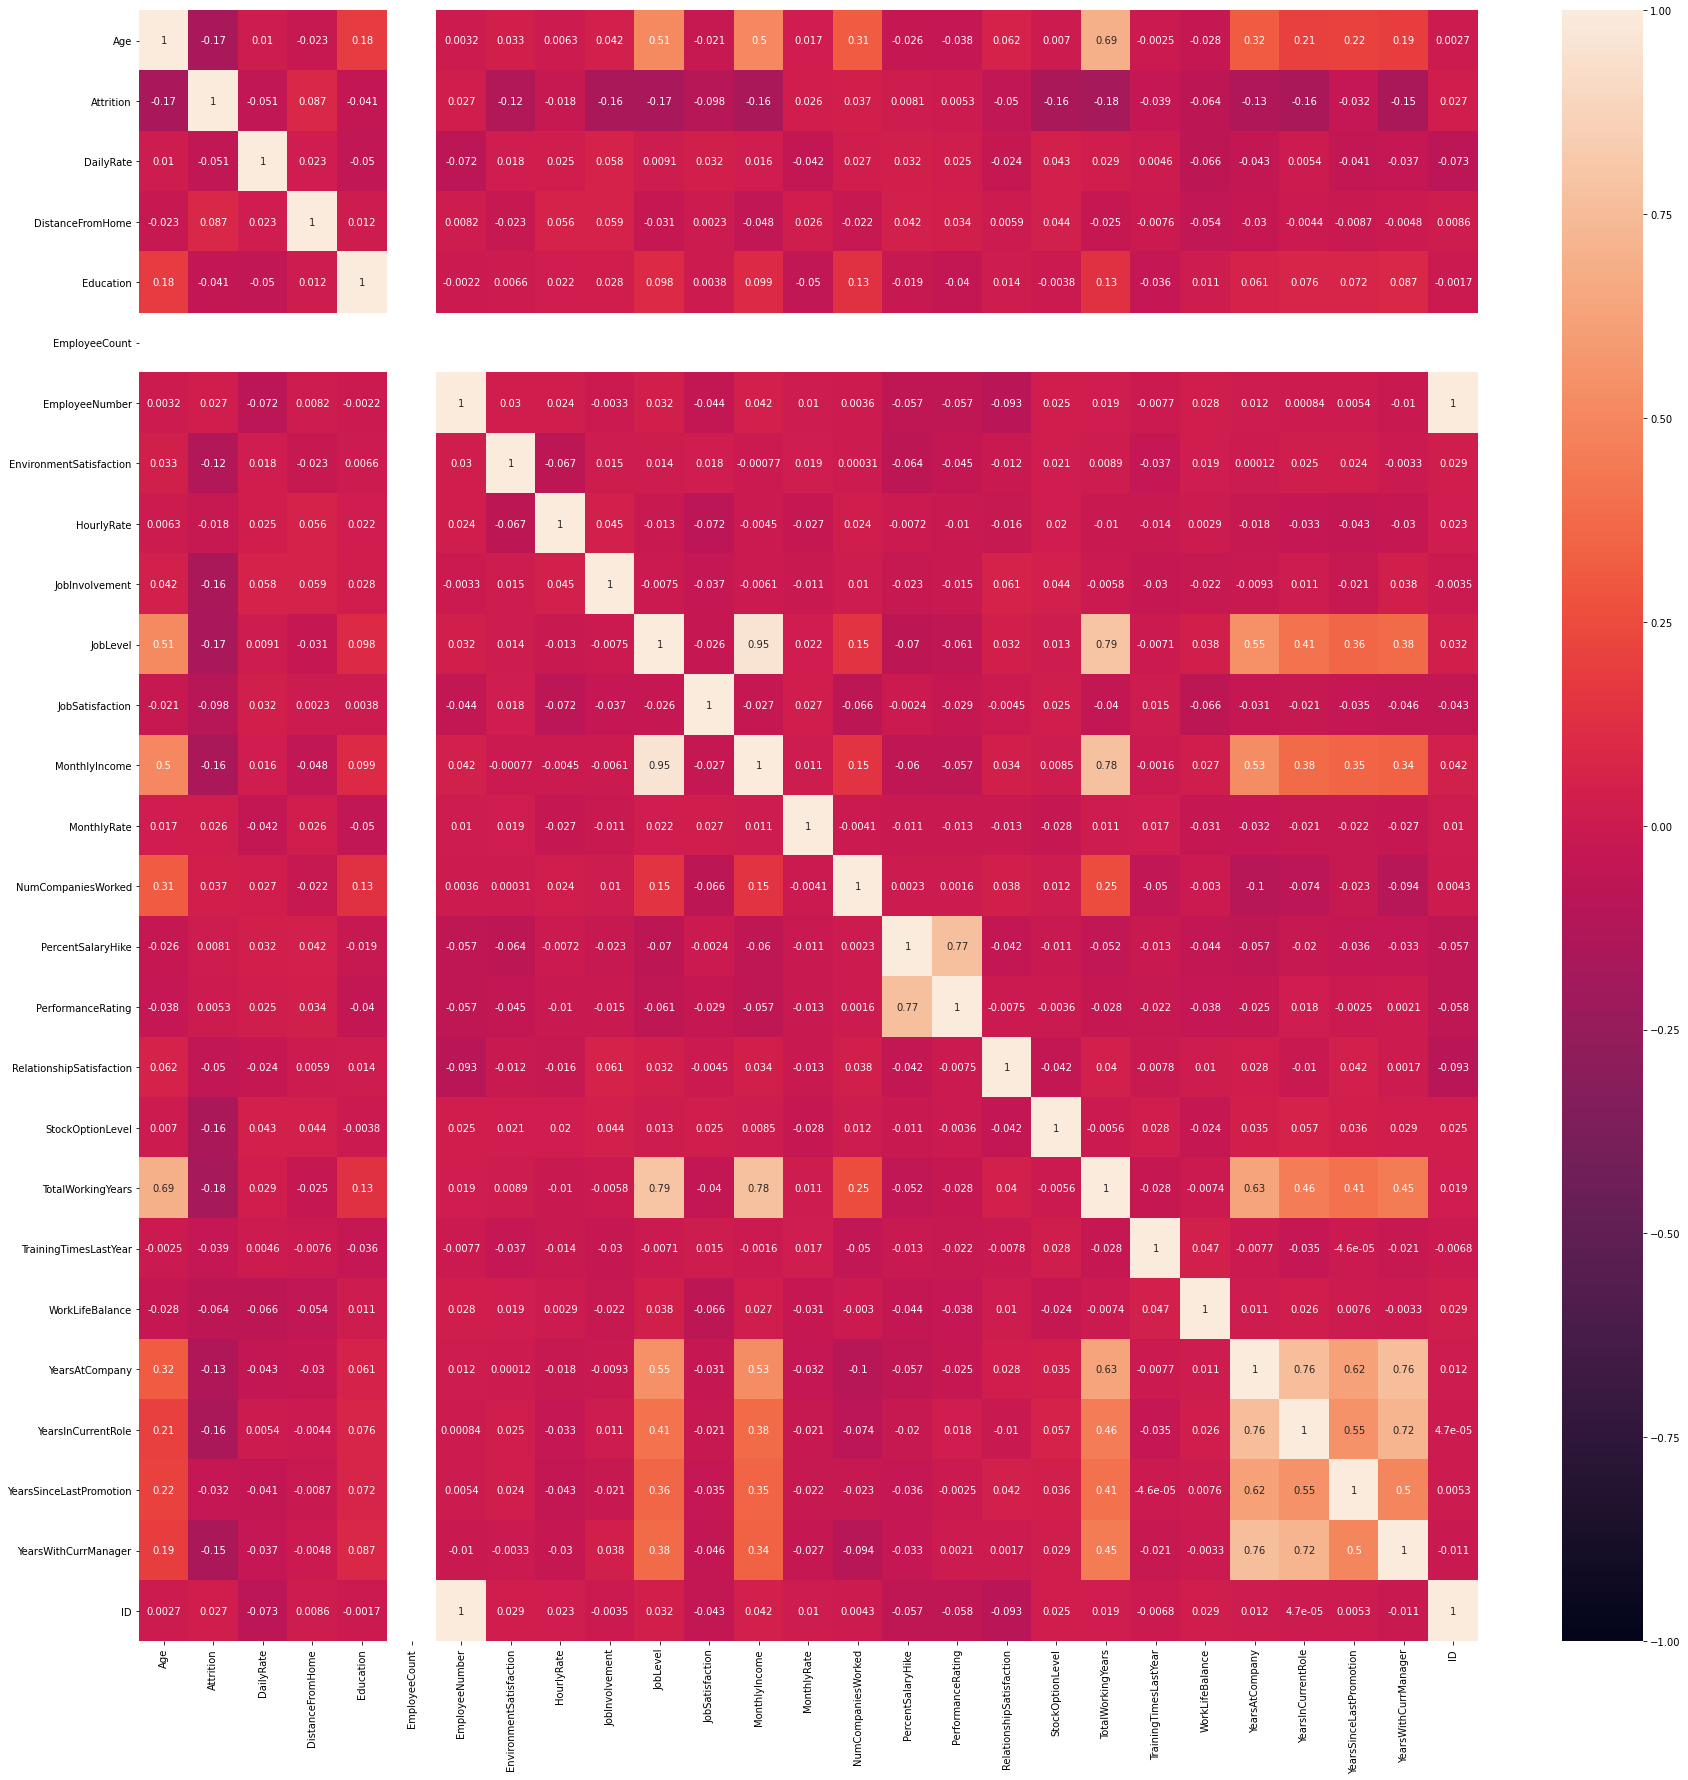

In [7]:
# Visualize corr coefficients
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.heatmap(attrition_data.corr(),
            vmin=-1,
            annot=True)
plt.show()

In [10]:
attrition_num = attrition_data.select_dtypes(['int64'])
attrition_num.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,4


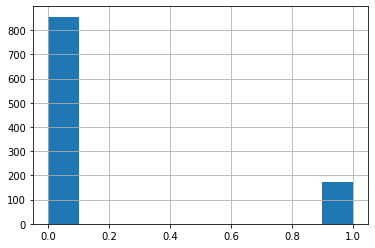

In [15]:
import matplotlib.pyplot as plt
plt.figure()
attrition_num.Attrition.hist()
plt.show()

In [33]:
data_corr = abs(attrition_num.corr()['Attrition'])
print(data_corr.sort_values(ascending=False))

Attrition                   1.000000
TotalWorkingYears           0.178842
JobLevel                    0.169121
Age                         0.168641
MonthlyIncome               0.163709
StockOptionLevel            0.160597
YearsInCurrentRole          0.159691
JobInvolvement              0.158768
YearsWithCurrManager        0.151208
YearsAtCompany              0.133021
EnvironmentSatisfaction     0.119202
JobSatisfaction             0.097518
DistanceFromHome            0.086875
WorkLifeBalance             0.064322
DailyRate                   0.050566
RelationshipSatisfaction    0.050263
Education                   0.041021
TrainingTimesLastYear       0.038728
NumCompaniesWorked          0.037174
YearsSinceLastPromotion     0.031826
EmployeeNumber              0.026833
ID                          0.026794
MonthlyRate                 0.025739
HourlyRate                  0.018472
PercentSalaryHike           0.008138
PerformanceRating           0.005300
Name: Attrition, dtype: float64


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(np.asarray(attrition_num['TotalWorkingYears']),
                                                    np.asarray(attrition_num['Attrition']),
                                                    test_size=0.2,
                                                    random_state=42)
#print(y_train.shape, y_test.shape)
#y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)
#print(y_train.shape, y_test.shape)

lr = LogisticRegression()
lr.fit(X_train.reshape(-1, 1), y_train)
y_pred = lr.predict(X_test.reshape(-1, 1))
print(accuracy_score(y_test, y_pred))

0.8592233009708737


So we got 85.92% on a single feature with highest corr value.

In [60]:
attrition_not_num = attrition_data.select_dtypes(['object'])
attrition_not_num.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


Travel_Rarely        729
Travel_Frequently    197
Non-Travel           102
Name: BusinessTravel, dtype: int64


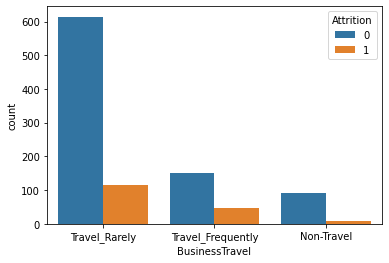

Research & Development    683
Sales                     309
Human Resources            36
Name: Department, dtype: int64


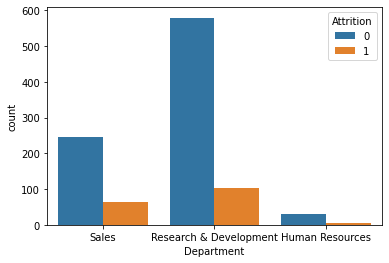

Life Sciences       427
Medical             320
Marketing           119
Technical Degree     90
Other                57
Human Resources      15
Name: EducationField, dtype: int64


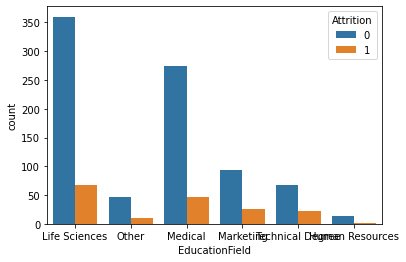

Male      597
Female    431
Name: Gender, dtype: int64


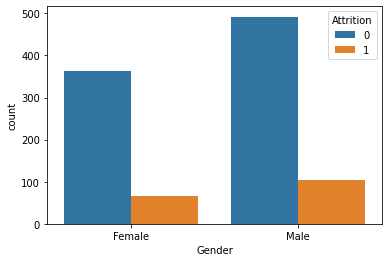

Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64


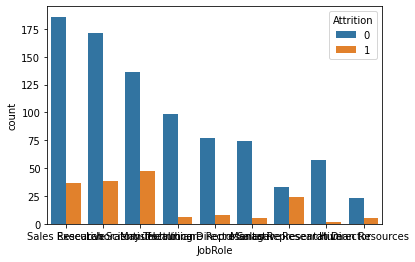

Married     454
Single      342
Divorced    232
Name: MaritalStatus, dtype: int64


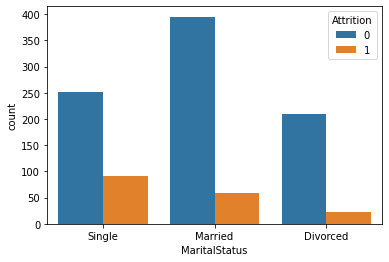

No     726
Yes    302
Name: OverTime, dtype: int64


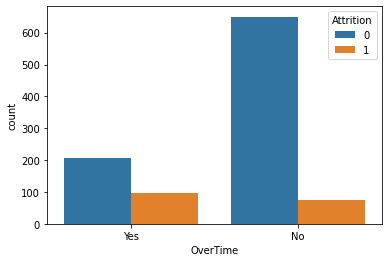

In [69]:
for cat in attrition_not_num.columns.to_list():
  print(attrition_not_num[cat].value_counts())
  plt.figure()
  sns.countplot(attrition_not_num[cat], hue=attrition_data['Attrition'])
  plt.show()

<Figure size 432x288 with 0 Axes>

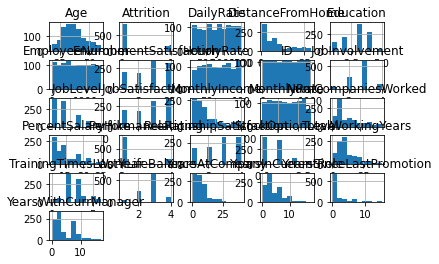

In [73]:
plt.figure()
attrition_num.hist()
plt.show()

In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for key in attrition_not_num.columns.to_list():
  attrition_not_num[key] = le.fit_transform(attrition_not_num[key])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [104]:
attrition_not_num.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,2,2,1,0,7,2,1
1,1,1,1,1,6,1,0
2,2,1,4,1,2,2,1
3,1,1,1,0,6,1,1
4,2,1,3,1,2,1,0


In [106]:
final_data = pd.concat([attrition_num, attrition_not_num], axis=1)
final_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,2,2,1,0,7,2,1
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,1,1,1,1,6,1,0
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,2,2,1,4,1,2,2,1
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,3,1,1,1,0,6,1,1
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,4,2,1,3,1,2,1,0


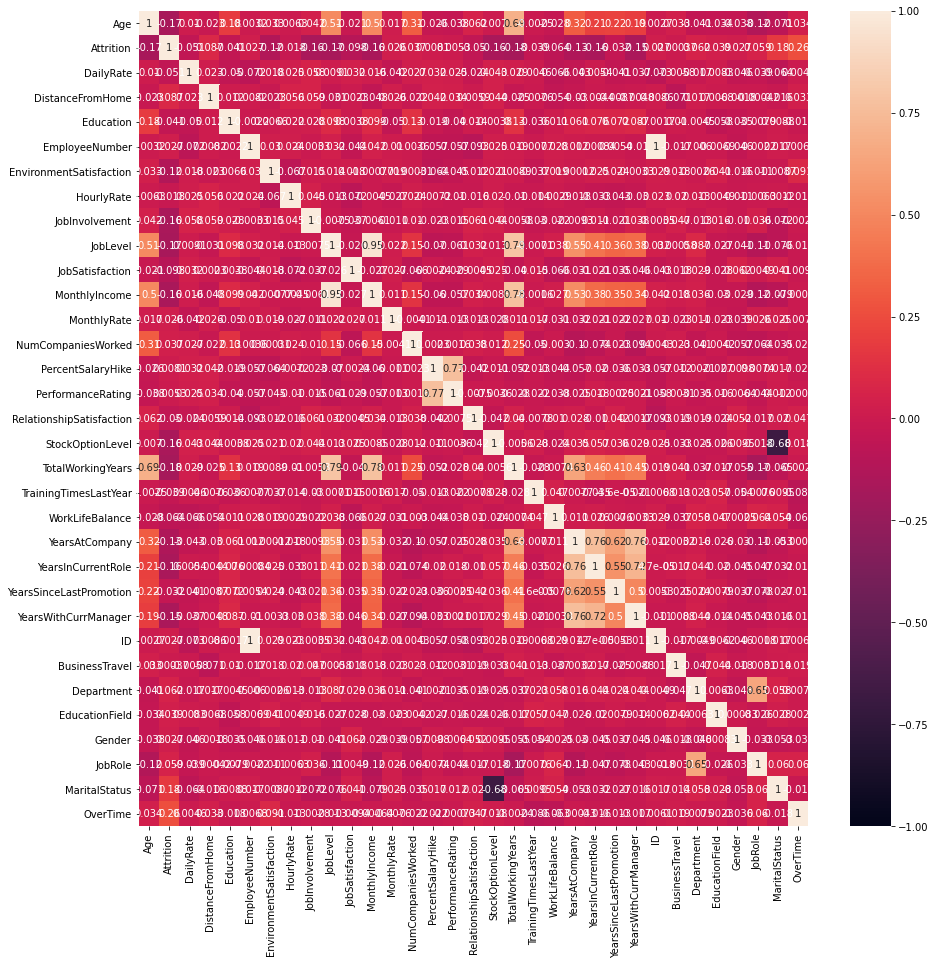

In [111]:
plt.figure(figsize=(15, 15))
sns.heatmap(final_data.corr(),
            vmin=-1,
            annot=True)
plt.show()

In [112]:
data_corr = abs(final_data.corr()['Attrition'])
print(data_corr.sort_values(ascending=False))

Attrition                   1.000000
OverTime                    0.260167
TotalWorkingYears           0.178842
MaritalStatus               0.178299
JobLevel                    0.169121
Age                         0.168641
MonthlyIncome               0.163709
StockOptionLevel            0.160597
YearsInCurrentRole          0.159691
JobInvolvement              0.158768
YearsWithCurrManager        0.151208
YearsAtCompany              0.133021
EnvironmentSatisfaction     0.119202
JobSatisfaction             0.097518
DistanceFromHome            0.086875
WorkLifeBalance             0.064322
Department                  0.062377
JobRole                     0.058852
DailyRate                   0.050566
RelationshipSatisfaction    0.050263
Education                   0.041021
EducationField              0.038902
TrainingTimesLastYear       0.038728
NumCompaniesWorked          0.037174
YearsSinceLastPromotion     0.031826
Gender                      0.027004
EmployeeNumber              0.026833
I

In [115]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(['Attrition'], axis=1),
                                                    final_data['Attrition'],
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape,
      y_train.shape,
      X_test.shape,
      y_test.shape)

(822, 32) (822,) (206, 32) (206,)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [116]:
rfc = RandomForestClassifier(max_depth=30, random_state=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [117]:
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8737864077669902


In [121]:
xgb = XGBClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

classifiers = [xgb, lr, dtc, knc, rfc]
for algo in classifiers:
  algo.fit(X_train, y_train)
  y_pred = algo.predict(X_test)
  print(accuracy_score(y_test, y_pred))

0.8592233009708737
0.8640776699029126
0.7766990291262136
0.8203883495145631


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8737864077669902


In [129]:
final_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,2,2,1,0,7,2,1
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,1,1,1,1,6,1,0
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,2,2,1,4,1,2,2,1
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,3,1,1,1,0,6,1,1
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,4,2,1,3,1,2,1,0


In [138]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(final_data.drop(['Attrition'], axis=1))
normalised_dataset = ss.transform(final_data.drop(['Attrition'], axis=1))
normalised_dataset.shape

(1028, 32)

In [0]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(normalised_dataset,
                                                                    final_data['Attrition'],
                                                                    test_size=0.2,
                                                                    random_state=42)

In [146]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

xgb = XGBClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

classifiers = [xgb, lr, dtc, knc, rfc]
for algo in classifiers:
  algo.fit(X_train_new, y_train_new)
  y_pred_new = algo.predict(X_test_new)
  print(accuracy_score(y_test_new, y_pred_new))
  print(confusion_matrix(y_test_new, y_pred_new))


0.8592233009708737
[[169   8]
 [ 21   8]]
0.8398058252427184
[[163  14]
 [ 19  10]]
0.7669902912621359
[[145  32]
 [ 16  13]]
0.8883495145631068
[[175   2]
 [ 21   8]]
0.8737864077669902
[[176   1]
 [ 25   4]]


**Max accuracy obtained by KNeighbiours classifier which is 88.84%.**

No such scaling or feature engineering performed. Just scaled using StandardScaler and took default values of all the classifiers I used.

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  